## SUStainable energy companies and its comparison to standard ones

In [1]:
# If yfinance library not installed
#pip install yfinance

In [2]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#import sys
import math
import datetime as dt
import yfinance as yf
#import functools as reduce

## Loading the Data 

- to see detatiled info on data that we use, see documentation
- We will take some of the biggest renewable Energy Companies in the World and create on portfolio from them
- And we will also take some of the largest energy companies that do not focus maily on sustainable resouces
- more details: frequency: daily, historical prices, time period: last 5Y

In [3]:
# Function to extract stock data we want
def get_stock_data(tickers, num_days_back, info_type):
    end_date = dt.datetime.now()
    start_date = end_date - dt.timedelta(days = num_days_back)
    
    # Initialize a dataframe to store stock data
    df = pd.DataFrame()
    
    # For each stock, download the desired information
    for ticker in tickers:
        data = yf.download(ticker, start = start_date, end = end_date)
        df[ticker] = data[info_type]
    
    return df

### Sustainable portfolio

In [4]:
# Stocks/Tickers we want to analyze
stocks_sustainable = ["AQN", "BEPC", "CEG", "CSIQ", "DQ", "GE", "IBDRY", "JKS", "NEE", "VWDRY"]

In [5]:
# Get Adjusted Close prices
df_sustain = get_stock_data(tickers = stocks_sustainable, num_days_back = 1000, info_type = "Adj Close")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [34]:
df_sustain.shape

(691, 10)

In [6]:
df_sustain.head(5) # CEG missing data

,AQN,BEPC,CEG,CSIQ,DQ,GE,IBDRY,JKS,NEE,VWDRY
Date,,,,,,,,,,
2021-04-05,14.112692,43.698132,NaN,46.419998,70.120003,83.245956,47.811470,38.511089,72.077118,13.801632
2021-04-06,13.942658,43.229816,NaN,47.750000,71.250000,82.874878,48.052315,40.128075,72.809341,13.157160
2021-04-07,13.857644,41.653721,NaN,45.720001,68.080002,82.813026,47.900669,38.013554,72.668549,12.978690
2021-04-08,13.951161,42.140060,NaN,44.820000,66.220001,83.184120,49.122719,37.181141,72.997101,13.355459
2021-04-09,13.968166,42.671429,NaN,43.369999,69.290001,84.111824,49.122719,36.980213,73.166084,13.339887


In [7]:
df_sustain.describe()

,AQN,BEPC,CEG,CSIQ,DQ,GE,IBDRY,JKS,NEE,VWDRY
count,691.000000,691.000000,490.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,10.308473,32.822087,82.118488,34.494298,49.408379,82.219829,44.190217,45.112058,73.933832,9.641994
std,2.918755,4.586469,21.312281,6.289805,14.324670,20.063675,3.991918,9.285121,7.768841,2.091073
min,4.935297,21.751743,41.020584,19.209999,22.110001,47.441074,33.913353,24.771481,48.921902,5.770000
25%,7.303898,29.407000,62.929283,30.304999,39.494999,68.100872,41.293928,39.238255,70.122429,8.200000
50%,12.007927,32.705452,82.773609,36.049999,46.660000,80.237892,44.169998,45.218235,74.016663,9.350000
75%,12.932866,36.631231,94.460411,39.115000,61.270000,98.678909,47.249321,51.992363,79.878895,10.680694
max,14.225993,43.698132,126.227524,47.750000,91.989998,128.320007,52.669998,72.276466,88.899971,14.972935


In [8]:
df_sustain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 691 entries, 2021-04-05 to 2023-12-29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQN     691 non-null    float64
 1   BEPC    691 non-null    float64
 2   CEG     490 non-null    float64
 3   CSIQ    691 non-null    float64
 4   DQ      691 non-null    float64
 5   GE      691 non-null    float64
 6   IBDRY   691 non-null    float64
 7   JKS     691 non-null    float64
 8   NEE     691 non-null    float64
 9   VWDRY   691 non-null    float64
dtypes: float64(10)
memory usage: 59.4 KB


### Unsustainable portfolio

In [14]:
# Unsustainable companies tickers
stocks_unsustainable = ["EQNR", "BP", "0857.HK", "COP", "FP.VI", "SHEL", "CVX", "SR", "ENEL.MI"]

In [15]:
# Get the data -> ENEL and PETROCHINA not Found
df_unsustain = get_stock_data(tickers = stocks_unsustainable, num_days_back = 1000, info_type = "Adj Close")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [32]:
df_unsustain.shape


(691, 9)

In [33]:
# Check the data
df_unsustain.head(10)

,EQNR,BP,0857.HK,COP,FP.VI,SHEL,CVX,SR,ENEL.MI
Date,,,,,,,,,
2021-04-05,16.188482,21.416763,NaN,46.805847,NaN,36.119453,93.532219,66.092751,NaN
2021-04-06,16.429605,22.158316,NaN,47.137550,33.201477,36.164818,92.699898,66.431709,7.304790
2021-04-07,16.462862,22.396671,2.159770,46.958260,33.265465,36.645687,93.245811,66.663605,7.332116
2021-04-08,16.013878,21.822844,2.152001,45.936253,32.540264,35.457127,92.198715,67.546631,7.387623
2021-04-09,15.739495,21.531527,2.120925,45.927292,32.314171,35.302883,92.109207,67.930161,7.338947
2021-04-12,15.772755,21.734570,2.113156,45.595589,32.181934,35.121422,91.088959,68.492088,7.326993
2021-04-13,15.914103,21.734570,2.128694,45.532833,32.288578,35.066990,91.500641,67.965828,7.362005
2021-04-14,16.437920,22.546745,2.159770,47.236168,32.698101,36.246475,93.317406,67.956917,7.266360
2021-04-15,16.521070,22.246592,2.183077,46.527935,32.049683,36.065014,92.556702,69.036171,7.327847


In [17]:
# Summary information
df_unsustain.describe()

,EQNR,BP,0857.HK,COP,FP.VI,SHEL,CVX,SR,ENEL.MI
count,691.000000,691.000000,655.000000,691.000000,680.000000,691.000000,691.000000,691.000000,683.000000
mean,26.717458,30.167498,3.692642,90.623115,47.279301,50.901160,138.116014,63.614655,5.730393
std,5.271861,5.348282,1.021423,24.154803,9.578169,9.307231,27.998039,4.579410,0.813602
min,15.739495,20.626503,2.105387,43.614346,30.330439,33.939934,86.570305,54.103111,3.739416
25%,22.780868,25.344926,2.999993,67.786160,38.947859,42.644035,107.650196,59.439091,5.171456
50%,28.270969,29.450912,3.284909,97.278999,47.261520,51.723854,150.038605,64.330551,5.846578
75%,31.038495,35.073862,4.812596,111.690407,54.978357,58.690430,159.155716,67.269314,6.215000
max,36.601448,40.300167,5.900000,128.852463,64.430000,67.861908,180.690491,73.165520,7.459356


In [18]:
# Info
df_unsustain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 691 entries, 2021-04-05 to 2023-12-29
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EQNR     691 non-null    float64
 1   BP       691 non-null    float64
 2   0857.HK  655 non-null    float64
 3   COP      691 non-null    float64
 4   FP.VI    680 non-null    float64
 5   SHEL     691 non-null    float64
 6   CVX      691 non-null    float64
 7   SR       691 non-null    float64
 8   ENEL.MI  683 non-null    float64
dtypes: float64(9)
memory usage: 54.0 KB


###  Potential Data preparation

In [37]:
df_sustain.isna().sum()

AQN        0
BEPC       0
CEG      201
CSIQ       0
DQ         0
GE         0
IBDRY      0
JKS        0
NEE        0
VWDRY      0
dtype: int64

In [43]:
df_sustain.loc[df_sustain.duplicated()]

,AQN,BEPC,CEG,CSIQ,DQ,GE,IBDRY,JKS,NEE,VWDRY
Date,,,,,,,,,,


In [40]:
df_unsustain.isna().sum()

EQNR        0
BP          0
0857.HK    36
COP         0
FP.VI      11
SHEL        0
CVX         0
SR          0
ENEL.MI     8
dtype: int64

In [44]:
df_unsustain.loc[df_unsustain.duplicated()]

,EQNR,BP,0857.HK,COP,FP.VI,SHEL,CVX,SR,ENEL.MI
Date,,,,,,,,,


In [ ]:
df

### Explanatory data analysis

#### Exploring sustainable porfolio 

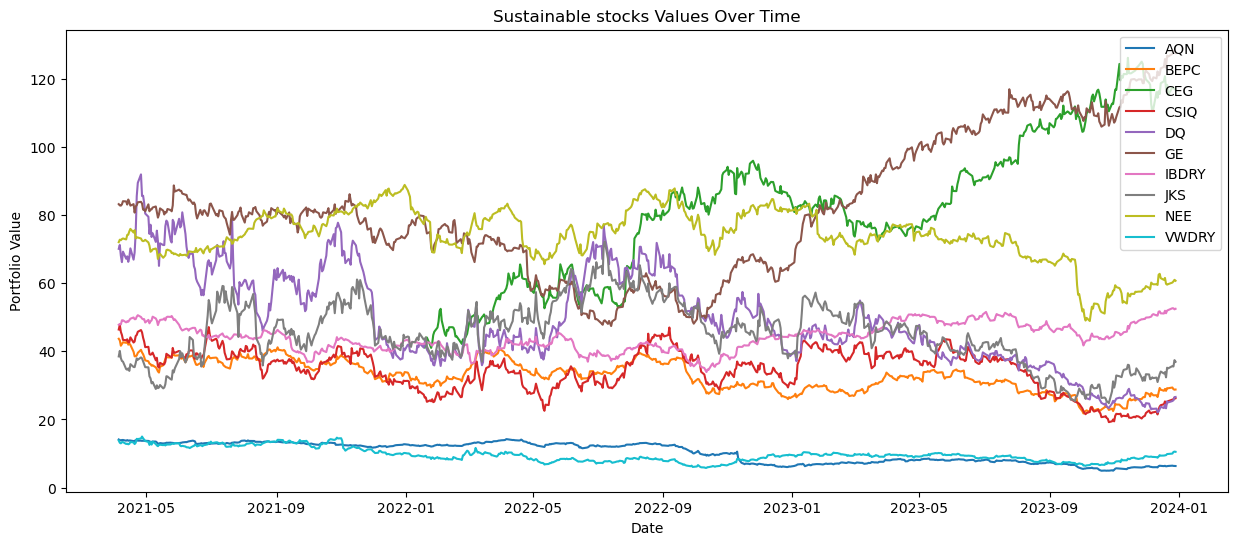

In [29]:
#graph of sustainable stocks separately
plt.figure(figsize=(15, 6))
for column in df_sustain.columns:
    plt.plot(df_sustain.index, df_sustain[column], label=column)
    plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Sustainable stocks Values Over Time')
plt.legend()
plt.show()

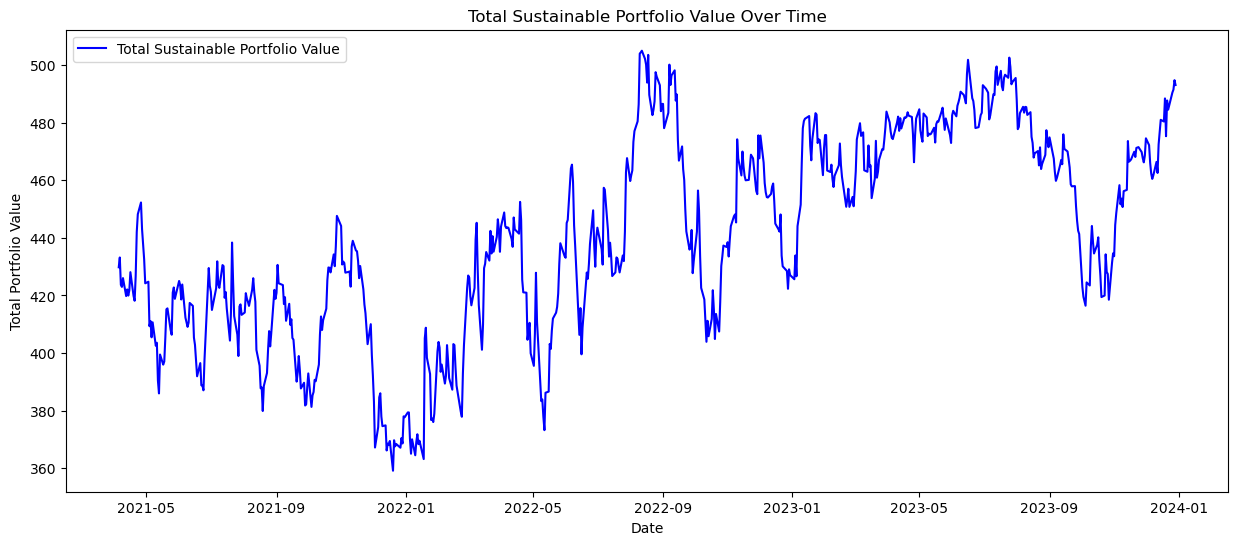

In [46]:
#graph of sustainable stocks colectively
# Summing the data across columns
total_portfolio = df_sustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data
plt.plot(total_portfolio.index, total_portfolio, label='Total Sustainable Portfolio Value', color="blue")

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value')
plt.title('Total Sustainable Portfolio Value Over Time')
plt.legend()

# Displaying the plot
plt.show()

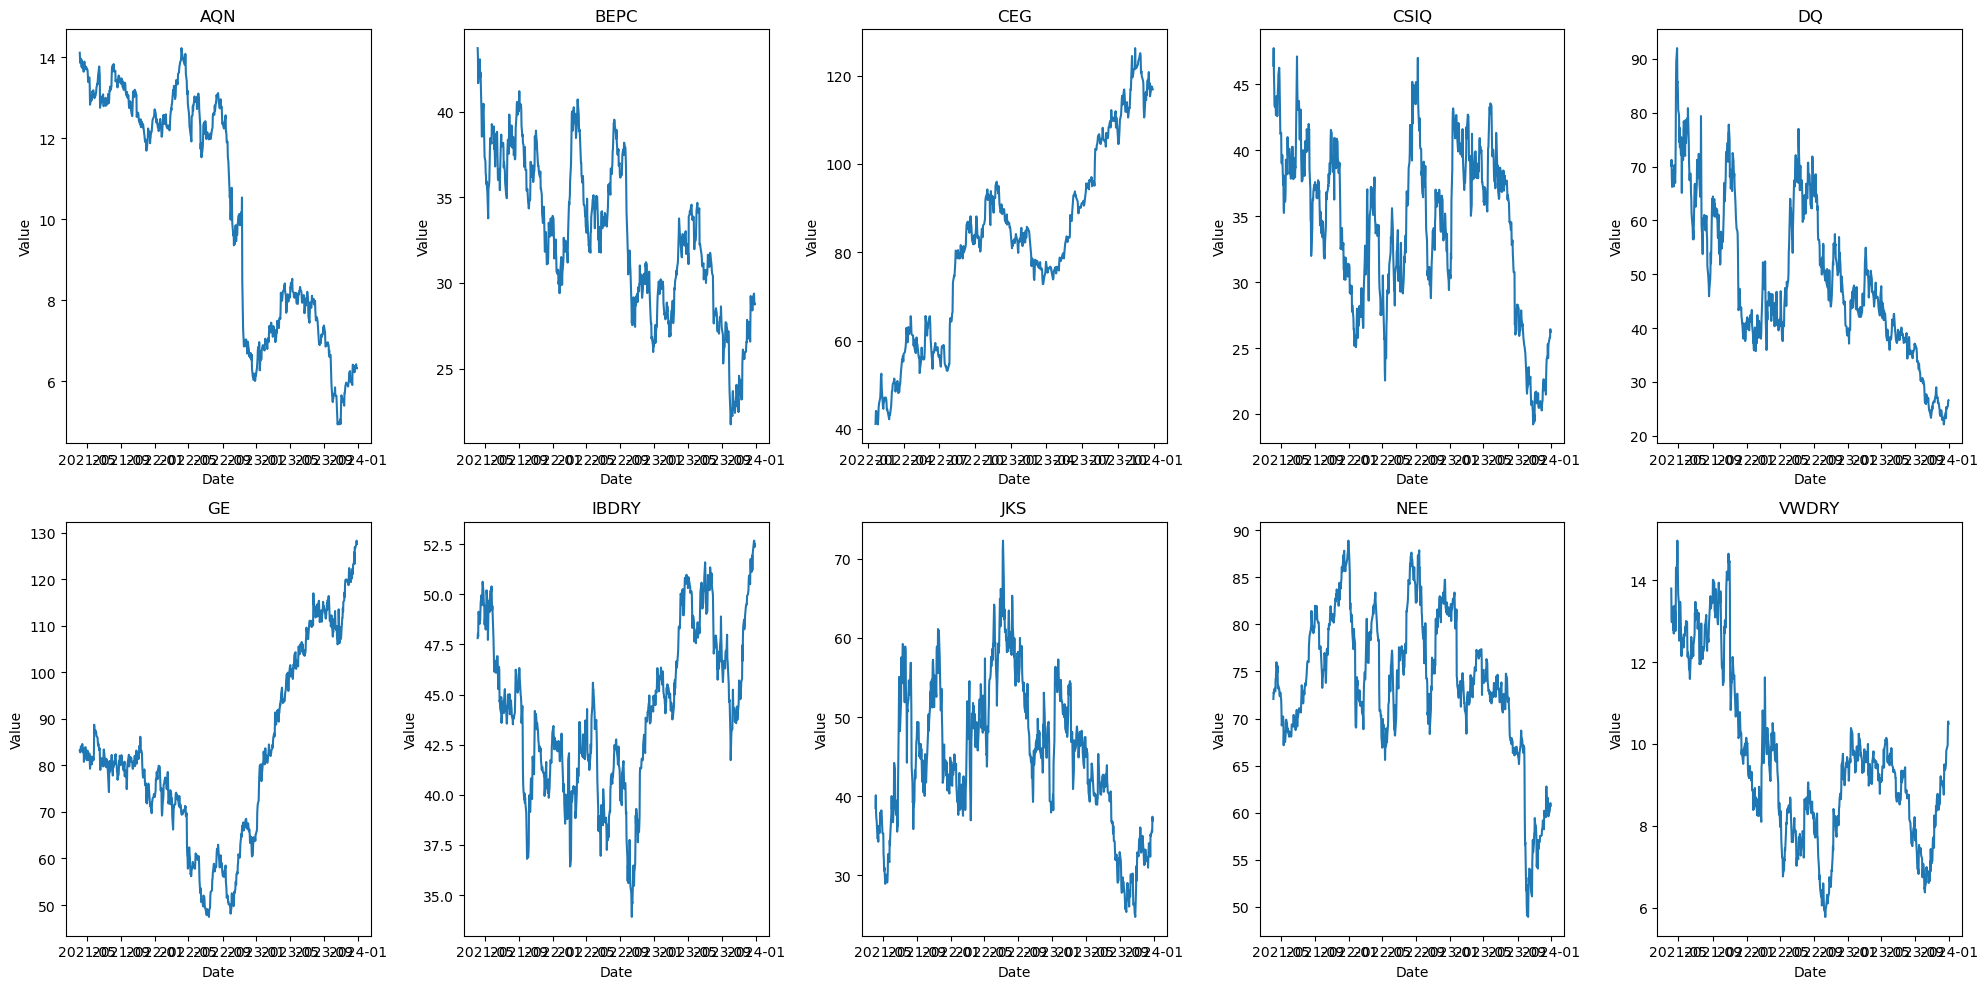

In [50]:
# Number of rows and columns for the subplot grid
nrows = 2
ncols = 5

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the DataFrame's columns and create a plot for each
for i, column in enumerate(df_sustain.columns):
    axes[i].plot(df_sustain.index, df_sustain[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Exploring unsustainable porfolio 

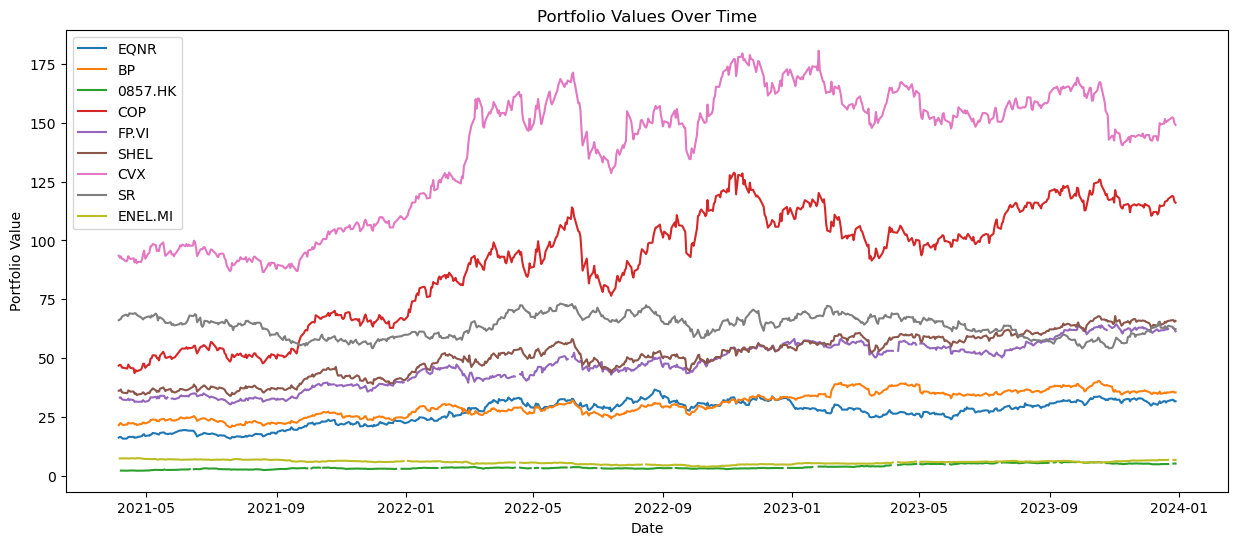

In [28]:
#graph of sustainable stocks separately
plt.figure(figsize=(15, 6))
for column in df_unsustain.columns:
    plt.plot(df_unsustain.index, df_unsustain[column], label=column)
    plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Values Over Time')
plt.legend()
plt.show()

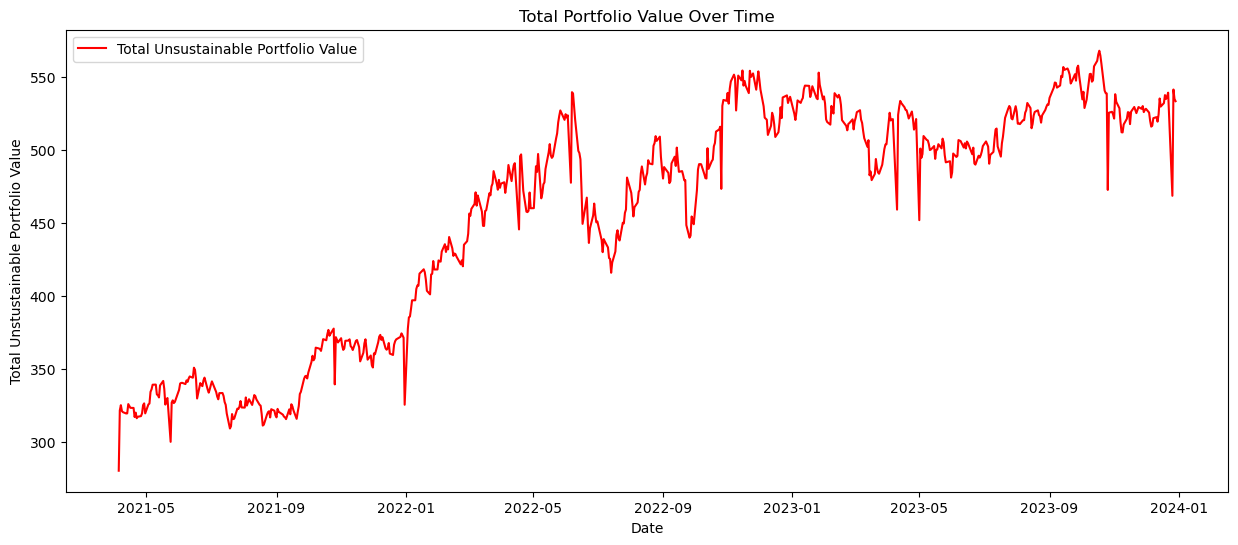

In [49]:
# Stotal portfolio
total_un_portfolio = df_unsustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data
plt.plot(total_un_portfolio.index, total_un_portfolio, label='Total Unsustainable Portfolio Value', color="red")

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Unstustainable Portfolio Value')
plt.title('Total Portfolio Value Over Time')
plt.legend()

# Displaying the plot
plt.show()

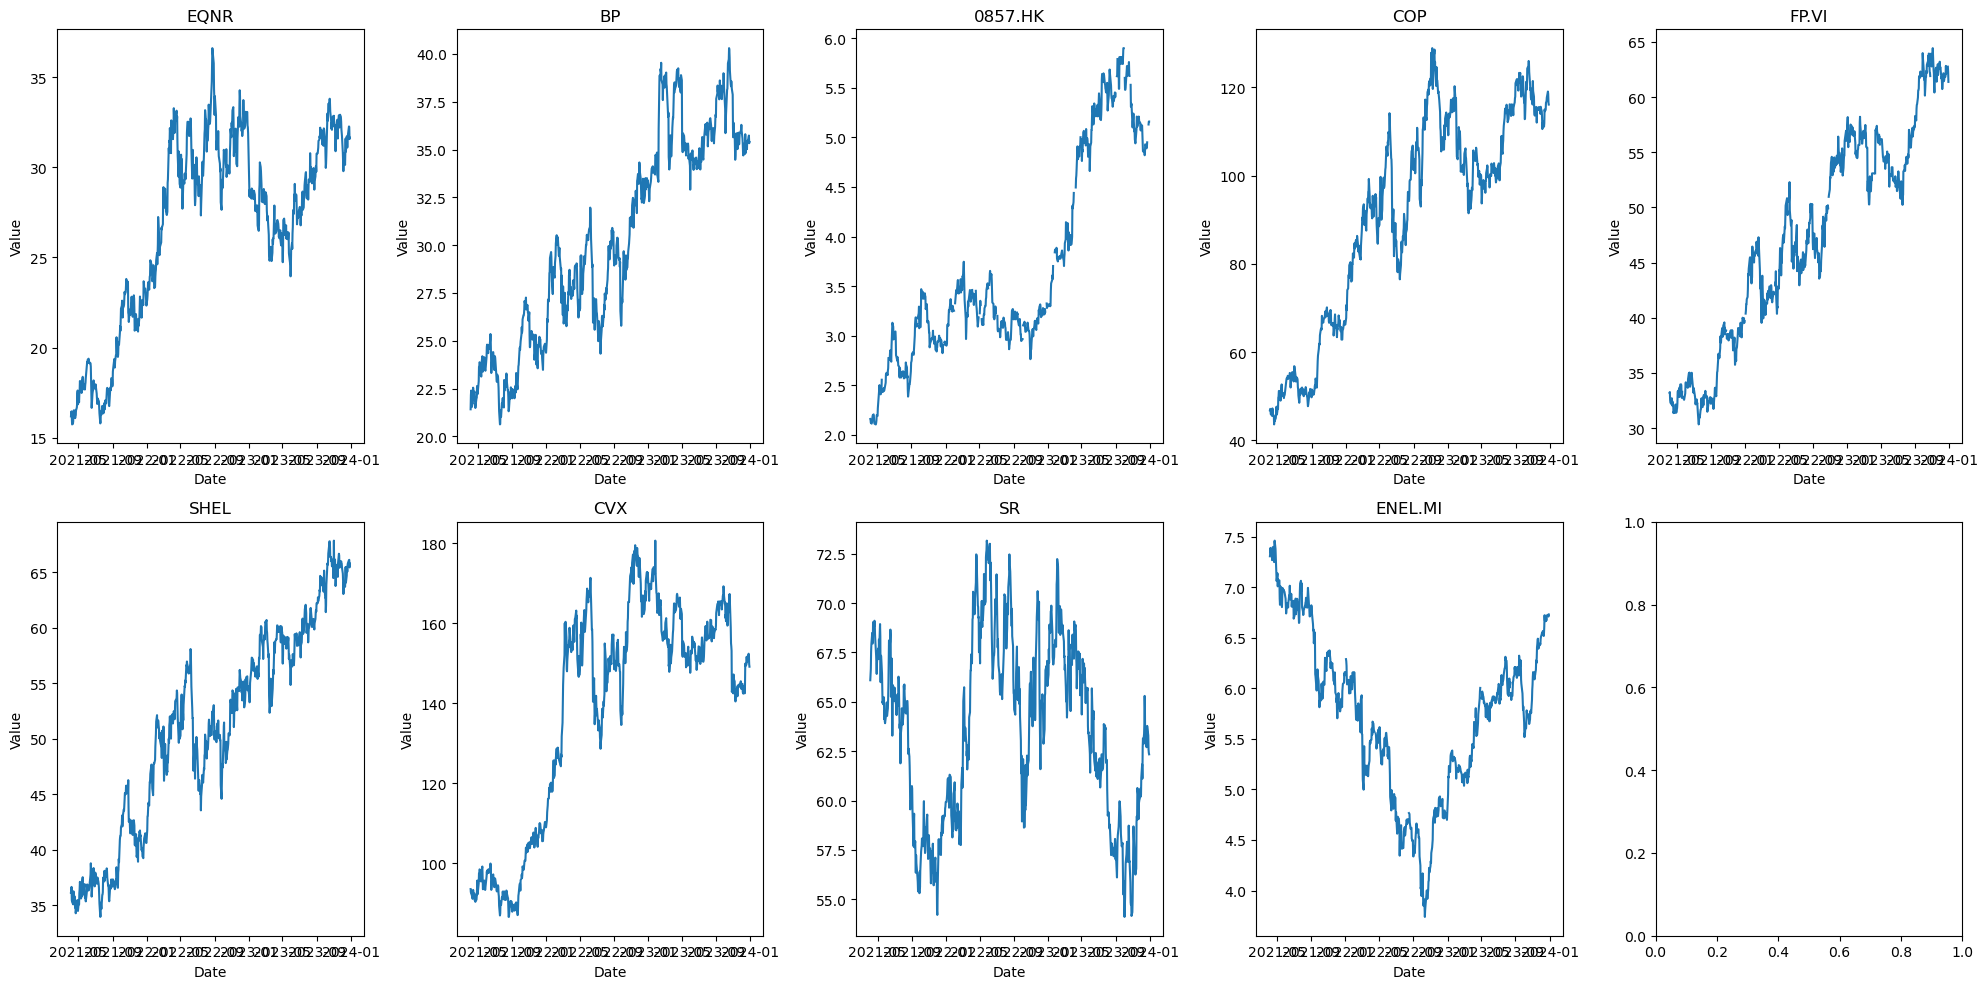

In [52]:
# Number of rows and columns for the subplot grid
nrows = 2
ncols = 5

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the DataFrame's columns and create a plot for each
for i, column in enumerate(df_unsustain.columns):
    axes[i].plot(df_unsustain.index, df_unsustain[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Combination of both portfolios

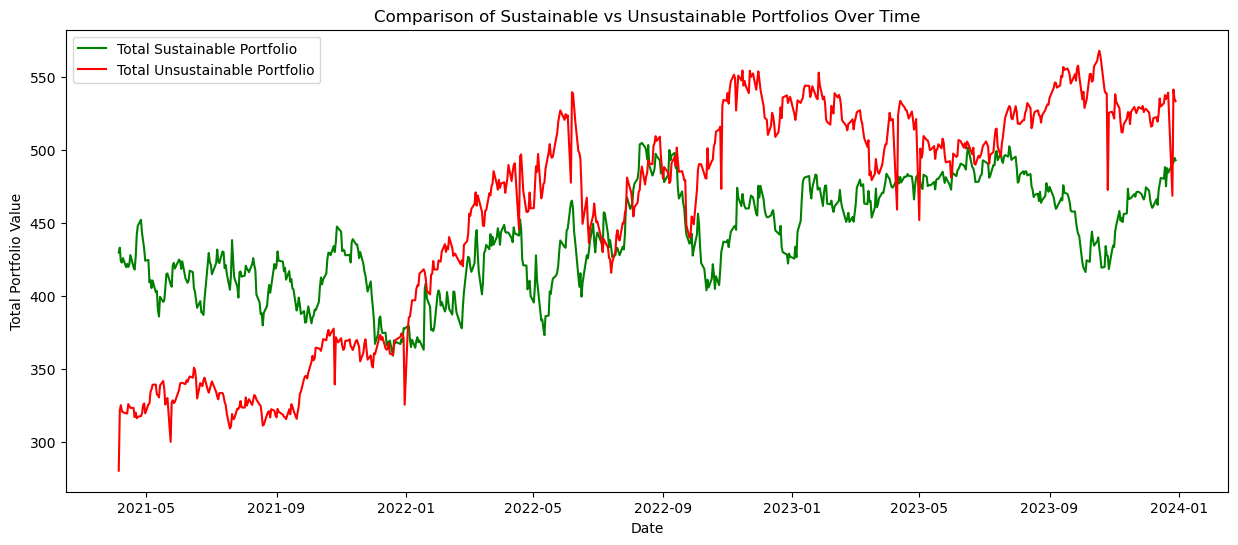

In [53]:
# Summing the data across columns for both DataFrames
total_sustain = df_sustain.sum(axis=1)
total_unsustain = df_unsustain.sum(axis=1)

# Set the size of the plot
plt.figure(figsize=(15, 6))

# Plotting the summed data for both DataFrames
plt.plot(total_sustain.index, total_sustain, label='Total Sustainable Portfolio', color='green')
plt.plot(total_unsustain.index, total_unsustain, label='Total Unsustainable Portfolio', color='red')

# Customizing the graph
plt.xlabel('Date')
plt.ylabel('Total Portfolio Value')
plt.title('Comparison of Sustainable vs Unsustainable Portfolios Over Time')
plt.legend()

# Displaying the plot
plt.show()

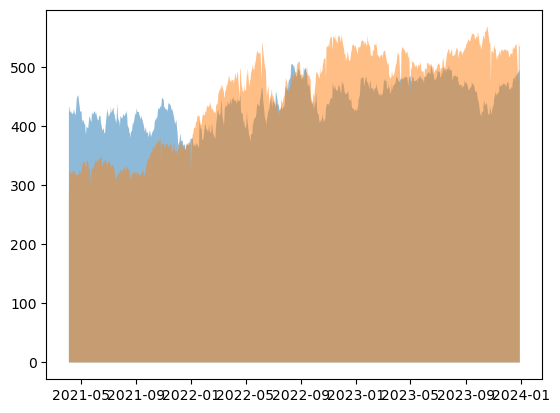

In [54]:
# Area Plot for Cumulative Values
#An area plot can be used to display the cumulative values over time, showing how each portfolio's total value grows.
#This can be particularly effective in highlighting the growth difference between the two portfolios.
plt.fill_between(total_sustain.index, total_sustain, label='Sustainable', alpha=0.5)
plt.fill_between(total_unsustain.index, total_unsustain, label='Unsustainable', alpha=0.5)


In [56]:
# Bar Chart for Comparing Specific Intervals
monthly_sustain = df_sustain.resample('M').mean()
monthly_unsustain = df_unsustain.resample('M').mean()


<Axes: >

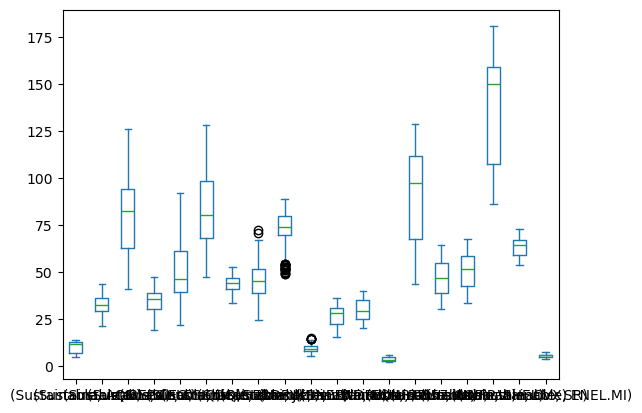

In [57]:
#Box Plot for Distribution Analysis
combined_data = pd.concat([df_sustain, df_unsustain], axis=1, keys=['Sustainable', 'Unsustainable'])
combined_data.plot(kind='box')

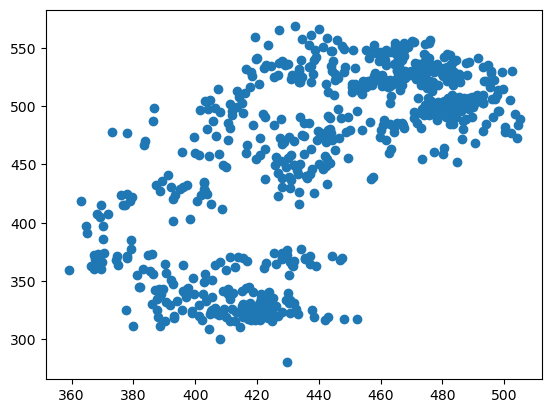

In [58]:
#Scatter Plot for Correlation Analysis
plt.scatter(df_sustain.sum(axis=1), df_unsustain.sum(axis=1))

<Axes: >

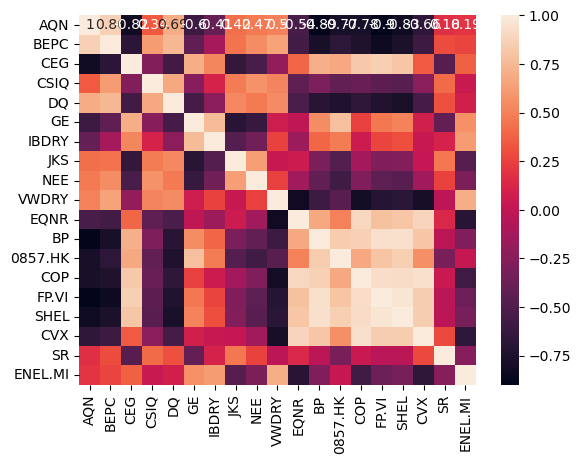

In [62]:
import seaborn as sns
#Heatmap for Correlation Between Stocks
correlation_matrix = pd.concat([df_sustain, df_unsustain], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True)

<Axes: xlabel='Date'>

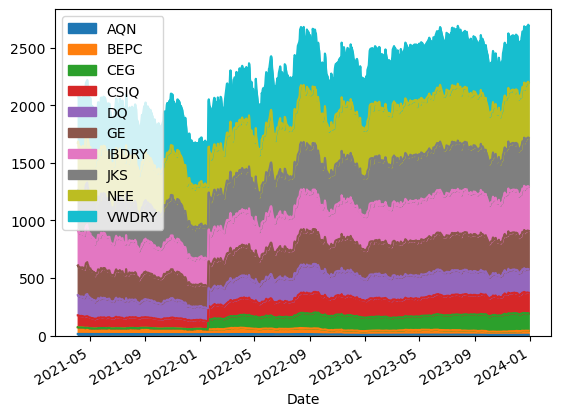

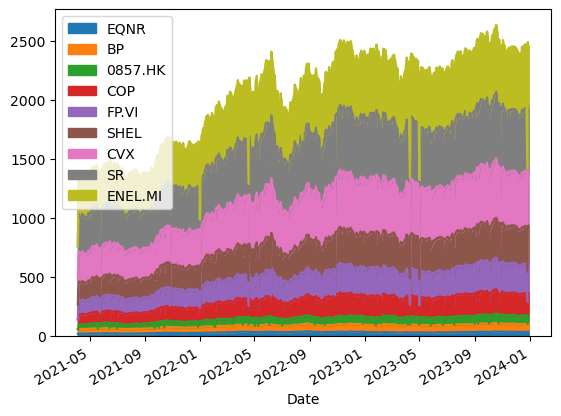

In [61]:
# Stacked Line or Area Chart for Portfolio Composition
df_sustain.cumsum(axis=1).plot(kind='area')
df_unsustain.cumsum(axis=1).plot(kind='area')


#### Analysis at this point in time 